In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt

# Data application ( prices + features)


In [3]:
aapl_with_features = pd.read_csv('../data/all_data/all_AAPL_data.csv')
googl_with_features = pd.read_csv('../data/all_data/all_GOOGL_data.csv')
msft_with_features = pd.read_csv('../data/all_data/all_MSFT_data.csv')

### Target

In [4]:
tickers = ['AAPL', 'GOOGL', 'MSFT']
data_dict = {
    'AAPL': aapl_with_features,
    'GOOGL': googl_with_features,
    'MSFT': msft_with_features
}
color_dict = {
     'AAPL': 'grey',
    'GOOGL': 'yellow',
    'MSFT': 'green'
}

In [5]:
def get_target(input_df, ticker):
    df = input_df.copy()
    df['Target'] = (df[f'Close_{ticker}'].shift(-1) > df[f'Close_{ticker}']).astype(int)
    df.dropna(inplace=True)
    return df

****************************************
Results for AAPL:
Accuracy: 0.5312810327706058
Precision: 0.5300207039337475
Recall: 0.9660377358490566
ROC AUC score: 0.5071278825995807
              precision    recall  f1-score   support

           0       0.56      0.05      0.09       477
           1       0.53      0.97      0.68       530

    accuracy                           0.53      1007
   macro avg       0.55      0.51      0.39      1007
weighted avg       0.54      0.53      0.40      1007

****************************************
Results for GOOGL:
Accuracy: 0.5084409136047666
Precision: 0.522956326987682
Recall: 0.871268656716418
ROC AUC score: 0.48340502899515164
              precision    recall  f1-score   support

           0       0.39      0.10      0.15       471
           1       0.52      0.87      0.65       536

    accuracy                           0.51      1007
   macro avg       0.46      0.48      0.40      1007
weighted avg       0.46      0.51      0.42

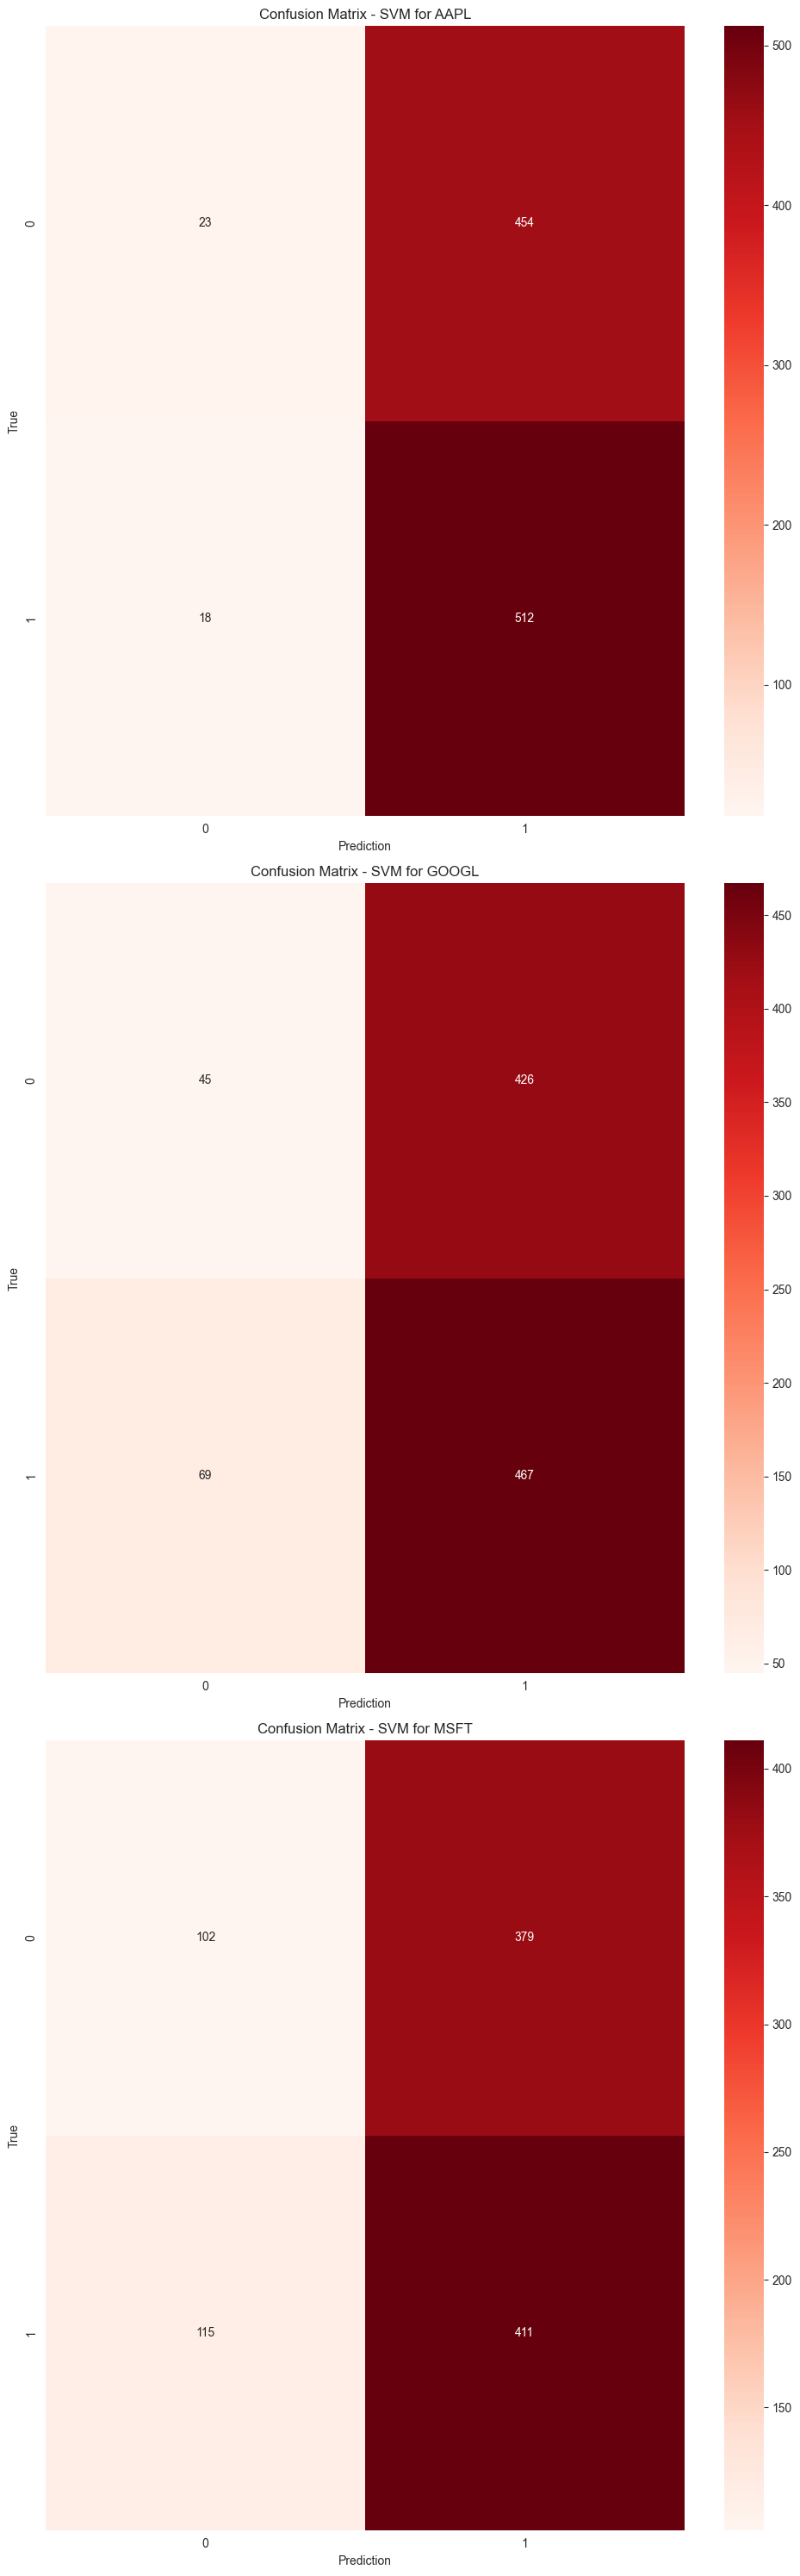

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))
result_dict = {}
for i, share in enumerate(tickers):
    df = get_target(data_dict[share], share)
    features = [col for col in df.columns if col not in ['Target', 'index', 'DATE']]
    
    X = df[features]
    y = df['Target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)),
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print('*' * 40)
    print(f"Results for {share}:")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC AUC score:", roc_auc)
    print(classification_report(y_test, y_pred))
    result_dict[share] = [acc, precision, recall, roc_auc]
    
    
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - SVM for {share}')
    axes[i].set_ylabel('True')
    axes[i].set_xlabel('Prediction')
plt.tight_layout()  
plt.show()

In [7]:
df_to_save = pd.DataFrame.from_dict(
    result_dict, 
    orient='index',
    columns=['accuracy', 'precision', 'recall', 'roc_auc']
)
print(df_to_save)
df_to_save.to_csv('../models_results/SVM_results.csv')

       accuracy  precision    recall   roc_auc
AAPL   0.531281   0.530021  0.966038  0.507128
GOOGL  0.508441   0.522956  0.871269  0.483405
MSFT   0.509434   0.520253  0.781369  0.496714
